In [1]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from neo4j_runway import Discovery
from neo4j_runway.llm.openai import OpenAIDataModelingLLM, OpenAIDiscoveryLLM
from neo4j_runway.utils.data import load_data_dictionary_from_yaml, load_local_files

from dotenv import load_dotenv

load_dotenv()

True

# Load Data

In [3]:
use_cases = ["How many subregions are in a region and how many countries are in a subregion?",
    "What is the most common currency?",
    "Which subregions contain the most cities?"]
data_dictionary = load_data_dictionary_from_yaml("./data_dictionary.yaml")
data = load_local_files(data_directory="../../data/countries/", general_description="These files contain information on countries.", use_cases=use_cases, data_dictionary=data_dictionary)

# Discovery

In [4]:
disc_llm = OpenAIDiscoveryLLM(model_name="gpt-4o-mini-2024-07-18", enable_async=True)
discovery = Discovery(llm=disc_llm, data=data)

In [5]:
discovery.run_async(num_calls=3)

### Summary of Insights for Graph Data Model

#### Unique Identifiers
- **City ID**: Unique identifier for each city from `cities.csv`.
- **Country ID**: Unique identifier for each country from `countries.csv`.
- **State ID**: Unique identifier for each state from `states.csv`.

#### Significant Properties
- **City Properties**: `name`, `state_id`, `country_id`
- **Country Properties**: `name`, `capital`, `currency`, `region`, `subregion`
- **State Properties**: `name`, `country_id`

#### Possible Node Labels
1. **City**: Represents individual cities.
2. **Country**: Represents countries.
3. **State**: Represents states within countries.
4. **Region**: Represents geographical regions that contain multiple countries.
5. **Subregion**: Represents subdivisions within regions that contain multiple countries.

#### Possible Relationships
- **(City)-[:LOCATED_IN]->(Country)**: Links cities to their respective countries.
- **(Country)-[:PART_OF]->(Subregion)**: Links countries to their respective subregions.
- **(Subregion)-[:PART_OF]->(Region)**: Links subregions to their respective regions.
- **(State)-[:LOCATED_IN]->(Country)**: Links states to their respective countries.

#### Use Case Considerations
1. **Subregions in a Region and Countries in a Subregion**:
   - Include nodes for `Region` and `Subregion` to represent the hierarchical structure. The relationship between `Country` and `Subregion` will allow counting countries per subregion, and the relationship between `Subregion` and `Region` will allow counting subregions per region.

2. **Most Common Currency**:
   - The `currency` property in the `Country` node can be used to identify and count occurrences of each currency, allowing for the determination of the most common currency.

3. **Subregions with Most Cities**:
   - By linking `City` nodes to `Country` nodes and subsequently to `Subregion` nodes, we can aggregate city counts per subregion to identify which subregions contain the most cities.

In [6]:
# with open("./outputs/final_discovery.md") as f:
#     discovery = f.read()

In [7]:
# print(discovery)

## Save Insights

In [8]:
# discovery.to_markdown(file_dir="./outputs/")

# Data Modeling

In [9]:
from neo4j_runway import GraphDataModeler

In [10]:
modeling_llm = OpenAIDataModelingLLM(model_name="gpt-4o-2024-08-06", model_params={"temperature": 0.5})
gdm = GraphDataModeler(llm=modeling_llm, discovery=discovery, data_dictionary=data_dictionary)

In [11]:
gdm.create_initial_model(use_advanced_data_model_generation_rules=False, use_yaml_data_model=True)

Entity Pool Generation Attempt: 1

 Please generate a pool of entities that will be used to construct a graph data model. Here are the initial discovery findings:
### Summary of Insights for Graph Data Model

#### Unique Identifiers
- **City ID**: Unique identifier for each city from `cities.csv`.
- **Country ID**: Unique identifier for each country from `countries.csv`.
- **State ID**: Unique identifier for each state from `states.csv`.

#### Significant Properties
- **City Properties**: `name`, `state_id`, `country_id`
- **Country Properties**: `name`, `capital`, `currency`, `region`, `subregion`
- **State Properties**: `name`, `country_id`

#### Possible Node Labels
1. **City**: Represents individual cities.
2. **Country**: Represents countries.
3. **State**: Represents states within countries.
4. **Region**: Represents geographical regions that contain multiple countries.
5. **Subregion**: Represents subdivisions within regions that contain multiple countries.

#### Possible Relati

DataModel(nodes=[Node(label='City', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other=None, is_unique=True, part_of_key=False), Property(name='name', type='str', csv_mapping='name', csv_mapping_other=None, is_unique=False, part_of_key=False)], source_name='cities.csv'), Node(label='Country', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other='country_id', is_unique=True, part_of_key=False), Property(name='name', type='str', csv_mapping='name', csv_mapping_other=None, is_unique=False, part_of_key=False), Property(name='capital', type='str', csv_mapping='capital', csv_mapping_other=None, is_unique=False, part_of_key=False), Property(name='currency', type='str', csv_mapping='currency', csv_mapping_other=None, is_unique=False, part_of_key=False)], source_name='countries.csv'), Node(label='State', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other='state_id', is_unique=True, part_of_key=False), Property(

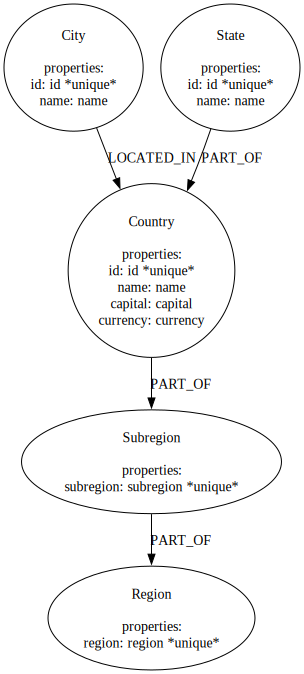

In [12]:
gdm.current_model.visualize()

In [13]:
corrections = "Create a node Currency with the unique property currency."

gdm.iterate_model(corrections=corrections)


 Please make corrections to the graph data model using the context provided. Here are the initial discovery findings:
### Summary of Insights for Graph Data Model

#### Unique Identifiers
- **City ID**: Unique identifier for each city from `cities.csv`.
- **Country ID**: Unique identifier for each country from `countries.csv`.
- **State ID**: Unique identifier for each state from `states.csv`.

#### Significant Properties
- **City Properties**: `name`, `state_id`, `country_id`
- **Country Properties**: `name`, `capital`, `currency`, `region`, `subregion`
- **State Properties**: `name`, `country_id`

#### Possible Node Labels
1. **City**: Represents individual cities.
2. **Country**: Represents countries.
3. **State**: Represents states within countries.
4. **Region**: Represents geographical regions that contain multiple countries.
5. **Subregion**: Represents subdivisions within regions that contain multiple countries.

#### Possible Relationships
- **(City)-[:LOCATED_IN]->(Country)*

DataModel(nodes=[Node(label='City', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other=None, is_unique=True, part_of_key=False), Property(name='name', type='str', csv_mapping='name', csv_mapping_other=None, is_unique=False, part_of_key=False)], source_name='cities.csv'), Node(label='Country', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other='country_id', is_unique=True, part_of_key=False), Property(name='name', type='str', csv_mapping='name', csv_mapping_other=None, is_unique=False, part_of_key=False), Property(name='capital', type='str', csv_mapping='capital', csv_mapping_other=None, is_unique=False, part_of_key=False)], source_name='countries.csv'), Node(label='State', properties=[Property(name='id', type='str', csv_mapping='id', csv_mapping_other='state_id', is_unique=True, part_of_key=False), Property(name='name', type='str', csv_mapping='name', csv_mapping_other=None, is_unique=False, part_of_key=False)], source_name='sta

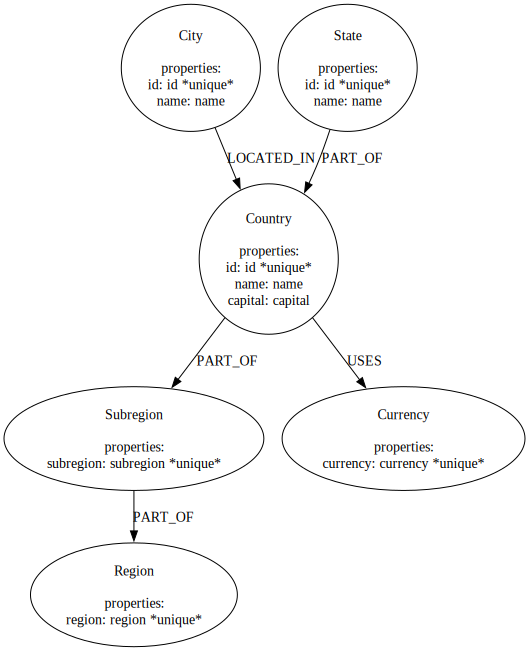

In [14]:
gdm.current_model.visualize()